In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Resample data per day

In [5]:
df = pd.read_csv('merged_orders.csv',                 
                 infer_datetime_format=True,
                 parse_dates=["order_date_order"],
                 index_col="order_date_order",
                 usecols=["order_date_order", "quantity"]
                 )
df.tail()

,quantity
order_date_order,
2014-07-19,129.99
2014-07-22,59.99
2014-07-22,50.00
2014-07-23,1999.99
2014-07-23,150.00


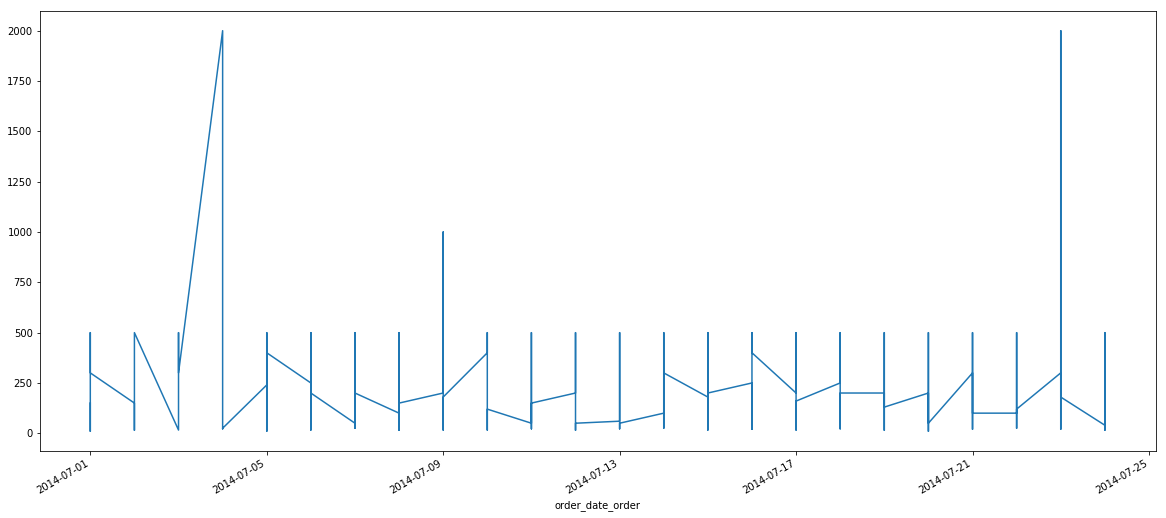

In [9]:
df[df.index >= '2014-07-01'].quantity.plot(figsize=(20,9))
plt.show()

In [10]:
df[df.index >= '2014-07-01'].head()

,quantity
order_date_order,
2014-07-01,150.00
2014-07-01,134.97
2014-07-01,119.97
2014-07-01,199.98
2014-07-01,179.96


In [13]:
df.groupby('order_date_order')[['quantity']].sum().head()

,quantity
order_date_order,
2013-07-25,68153.83
2013-07-26,136520.17
2013-07-27,101074.34
2013-07-28,87123.08
2013-07-29,137287.09


In [27]:
df_rs = df.resample('1d').sum()


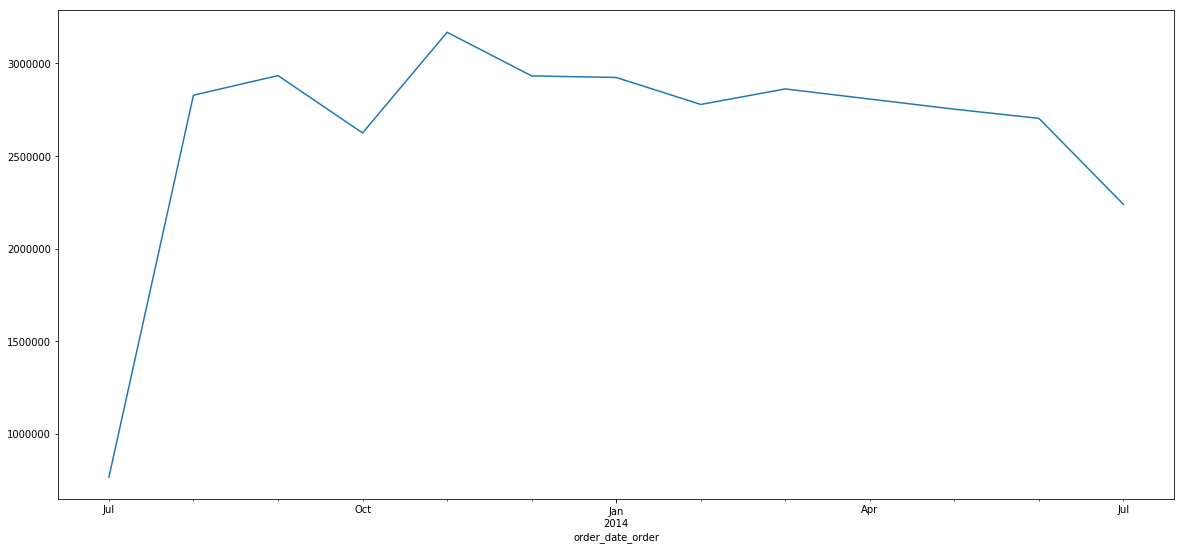

In [23]:
df_rs.quantity.plot(figsize=(20,9))
plt.show()

# Binning of sales quantities
## This is just a demo of binning - not recommended for time series

In [7]:
df_rs['bin'] = pd.cut(df_rs.quantity, 6)
df_rs.head()

,quantity,bin
order_date_order,,
2013-07-25,68153.83,"(58533.067, 87799.6]"
2013-07-26,136520.17,"(117066.133, 146332.667]"
2013-07-27,101074.34,"(87799.6, 117066.133]"
2013-07-28,87123.08,"(58533.067, 87799.6]"
2013-07-29,137287.09,"(117066.133, 146332.667]"


In [8]:
median_values = df_rs.groupby('bin').quantity.median()
df_rs['median_of_bin'] = df_rs.bin.map(median_values)
df_rs.head()

,quantity,bin,median_of_bin
order_date_order,,,
2013-07-25,68153.83,"(58533.067, 87799.6]",73198.91
2013-07-26,136520.17,"(117066.133, 146332.667]",127177.70
2013-07-27,101074.34,"(87799.6, 117066.133]",102048.32
2013-07-28,87123.08,"(58533.067, 87799.6]",73198.91
2013-07-29,137287.09,"(117066.133, 146332.667]",127177.70


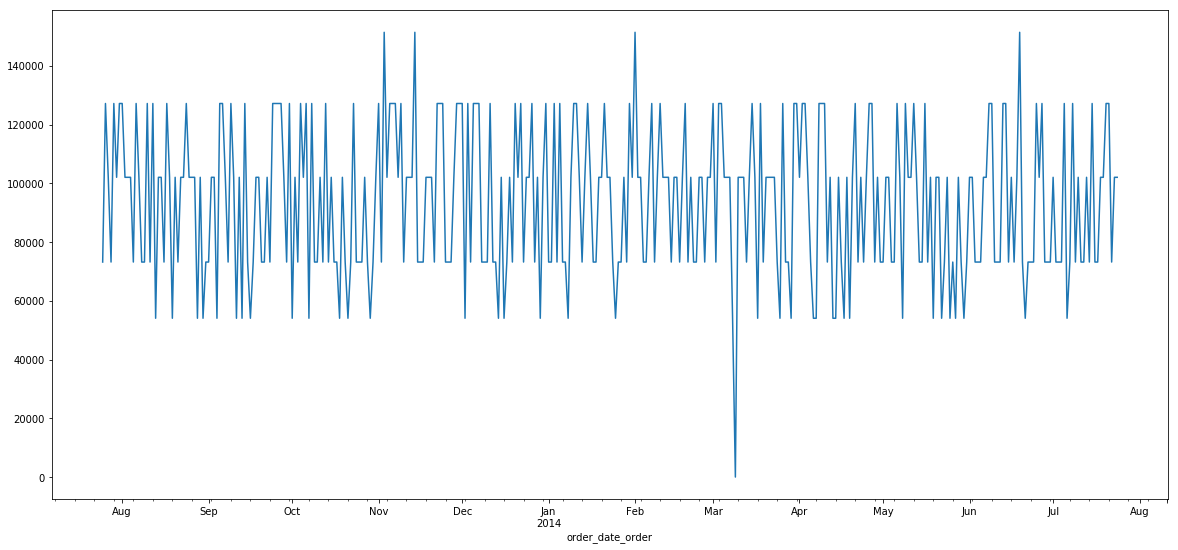

In [9]:
df_rs.median_of_bin.plot(figsize=(20,9))
plt.show()

# Moving average (more suitable for timeseries)

In [28]:
df_rs.head()

,quantity
order_date_order,
2013-07-25,68153.83
2013-07-26,136520.17
2013-07-27,101074.34
2013-07-28,87123.08
2013-07-29,137287.09


In [33]:
df_rs.quantity.rolling(4).mean().head(20)

order_date_order
2013-07-25            NaN
2013-07-26            NaN
2013-07-27            NaN
2013-07-28     98217.8550
2013-07-29    115501.1700
2013-07-30    107057.5325
2013-07-31    114758.4625
2013-08-01    125228.0975
2013-08-02    118243.0750
2013-08-03    116373.3925
2013-08-04    106136.6225
2013-08-05     92856.7950
2013-08-06     95663.4600
2013-08-07     97684.5850
2013-08-08     94077.2550
2013-08-09     90685.7950
2013-08-10     92936.0800
2013-08-11     84885.6300
2013-08-12     96231.0475
2013-08-13     90620.5600
Freq: D, Name: quantity, dtype: float64

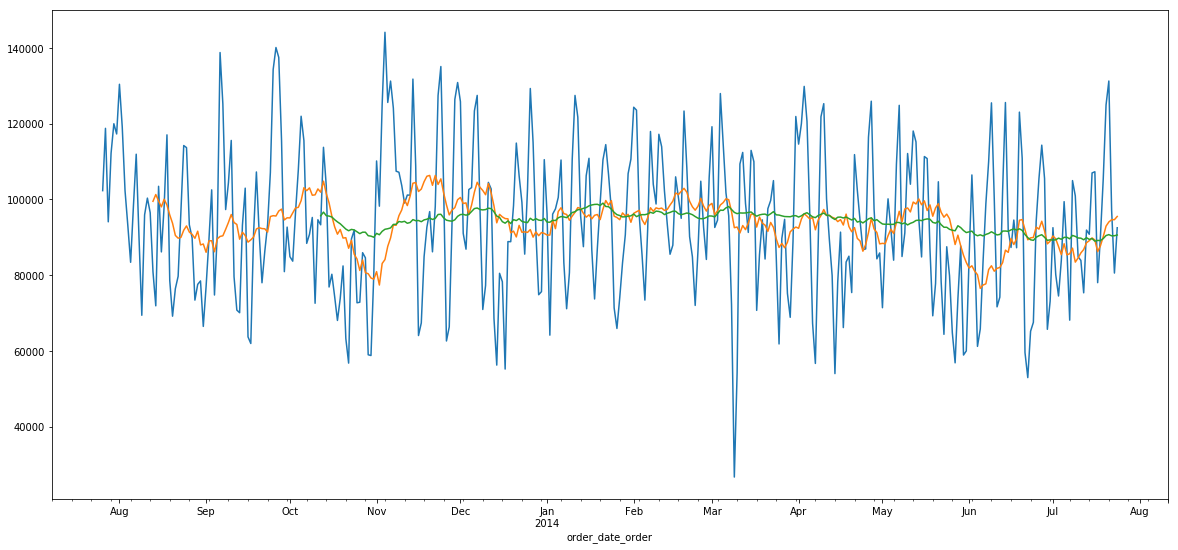

In [37]:
# use rolling to create the moving average over the last 20 periods
df_rs.quantity.rolling(2).mean().plot(figsize=(20,9))
df_rs.quantity.rolling(20).mean().plot(figsize=(20,9))
df_rs.quantity.rolling(80).mean().plot(figsize=(20,9))
plt.show()

In [31]:
df_rs.head()

,quantity,bin,median_of_bin
order_date_order,,,
2013-07-25,68153.83,"(58533.067, 87799.6]",73198.91
2013-07-26,136520.17,"(117066.133, 146332.667]",127177.70
2013-07-27,101074.34,"(87799.6, 117066.133]",102048.32
2013-07-28,87123.08,"(58533.067, 87799.6]",73198.91
2013-07-29,137287.09,"(117066.133, 146332.667]",127177.70


In [56]:
print(0.8*df_rs.iloc[0, 0] + 0.2*df_rs.iloc[1, 0])
df_rs.quantity.ewm(alpha=0.2, adjust=False).mean().head()

81827.09800000004


order_date_order
2013-07-25    68153.830000
2013-07-26    81827.098000
2013-07-27    85676.546400
2013-07-28    85965.853120
2013-07-29    96230.100496
Freq: D, Name: quantity, dtype: float64

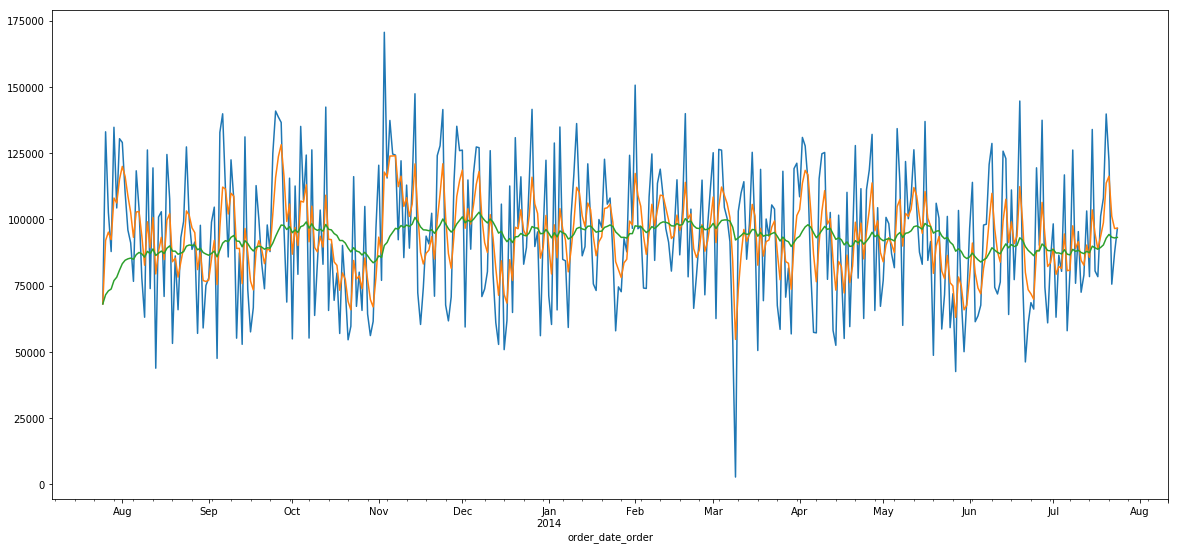

In [46]:
# use exponential smoothing 
df_rs.quantity.ewm(alpha=0.95, adjust=False).mean().plot(figsize=(20,9))
df_rs.quantity.ewm(alpha=0.35, adjust=False).mean().plot(figsize=(20,9))
df_rs.quantity.ewm(alpha=0.05, adjust=False).mean().plot(figsize=(20,9))
plt.show()

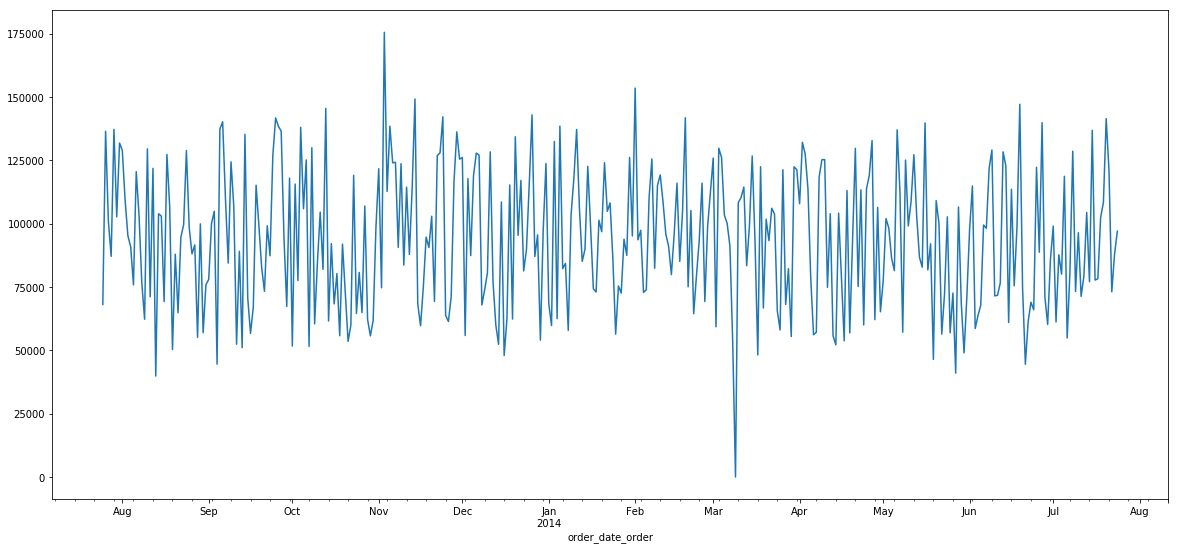

In [59]:
df_rs.quantity.plot(figsize=(20,9))
plt.show()